In [1]:
import time
import os
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
base_path = "./dataset/dataset_augmented/test/images"
images = os.listdir(base_path)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier(
    './__models/01_ViolaJones/haarcascade_frontalface_alt.xml')

times = []
bboxes = []

for idx, img in enumerate(images):
    # Read image from your local file system
    original_image = cv.imread(os.path.join(base_path, img))

    # Convert color image to grayscale for Viola-Jones
    grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

    start = time.time()
    detected_faces = face_cascade.detectMultiScale(grayscale_image)
    end = time.time()

    times.append(end - start)
    bboxes.append(detected_faces)

    print("[INFO] {:.6f} for image".format(end - start))

[INFO] 0.408998 for image
[INFO] 0.027500 for image
[INFO] 0.025998 for image
[INFO] 0.023999 for image
[INFO] 0.021998 for image
[INFO] 0.028502 for image
[INFO] 0.026500 for image
[INFO] 0.020500 for image
[INFO] 0.028003 for image
[INFO] 0.031998 for image
[INFO] 0.020492 for image
[INFO] 0.031500 for image
[INFO] 0.024501 for image
[INFO] 0.021500 for image
[INFO] 0.025498 for image
[INFO] 0.021998 for image
[INFO] 0.022000 for image
[INFO] 0.026000 for image
[INFO] 0.018500 for image
[INFO] 0.017999 for image
[INFO] 0.024498 for image
[INFO] 0.027003 for image
[INFO] 0.017999 for image
[INFO] 0.022998 for image
[INFO] 0.023000 for image
[INFO] 0.025496 for image
[INFO] 0.020999 for image
[INFO] 0.021500 for image
[INFO] 0.030000 for image
[INFO] 0.026499 for image
[INFO] 0.023499 for image
[INFO] 0.021500 for image
[INFO] 0.026500 for image
[INFO] 0.018491 for image
[INFO] 0.021499 for image
[INFO] 0.024496 for image
[INFO] 0.027498 for image
[INFO] 0.025494 for image
[INFO] 0.025

In [3]:
import pandas as pd
import numpy as np

p_images = []
p_times = []
p_x1 = []
p_y1 = []
p_x2 = []
p_y2 = []

for p_image, p_time, p_bbox in zip(images, times, bboxes):

    # No Bbox
    if len(p_bbox) == 0:
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(np.NAN)
        p_y1.append(np.NAN)
        p_x2.append(np.NAN)
        p_y2.append(np.NAN)

    # Bbox
    for box in p_bbox:
        # TODO :: Adjust format (x1, y1, ?, ?)
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(box[0])
        p_y1.append(box[1])
        p_x2.append(box[0] + box[2])
        p_y2.append(box[1] + box[3])

df = pd.DataFrame(list(zip(p_images, p_times, p_x1, p_y1, p_x2, p_y2)), columns=[
                  "Image", "Time", "X1", "Y1", "X2", "Y2"])
df


,Image,Time,X1,Y1,X2,Y2
0,1001_jpg.rf.b7c44a27e79dbc4de661327ba01c1edd.jpg,0.408998,202.0,213.0,502.0,513.0
1,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,0.027500,270.0,178.0,512.0,420.0
2,1014_jpg.rf.c539a1eadeef2d13f1bf7d0f7b5c254c.jpg,0.025998,151.0,168.0,344.0,361.0
3,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,0.023999,319.0,159.0,419.0,259.0
4,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,0.023999,188.0,71.0,301.0,184.0
...,...,...,...,...,...,...
1091,985_jpg.rf.9277df9a3b6c30be5d85b888f18bb41f.jpg,0.027001,352.0,136.0,487.0,271.0
1092,986_jpg.rf.6f8ff4f13b76e435399fe4d604c285b3.jpg,0.025998,233.0,187.0,515.0,469.0
1093,987_jpg.rf.dff0e90c55a7621864aee639fd482d98.jpg,0.025498,211.0,156.0,297.0,242.0
1094,98_jpg.rf.c929bd3c5be065cfdc29dfe04ff72d87.jpg,0.017000,238.0,220.0,370.0,352.0


1167_jpg.rf.efaecc77faead3bc6ea34551d28a5fa1.jpg
89 168 311 390
275 144 518 387


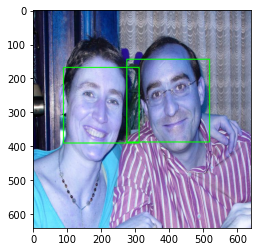

In [19]:
image_names = np.unique(df.Image)
current_entry = image_names[11]
print(current_entry)

current_df = df[df['Image'] == current_entry]

# Read image from your local file system
testImage = cv.imread(os.path.join(base_path, current_entry))

for df_idx, row in current_df.iterrows():
    if np.isnan(row['X1']):
        continue

    x1 = int(row['X1'])
    y1 = int(row['Y1'])
    x2 = int(row['X2'])
    y2 = int(row['Y2'])

    print(x1, y1, x2, y2)

    cv.rectangle(
        testImage,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

plt.figure(figsize=(4, 4))
plt.imshow(testImage)
plt.show()


In [5]:
model_name = "ViolaJones"

folder_path = f"./test_results/{model_name}"
os.mkdir(folder_path)

results_path = f"./test_results/{model_name}.xlsx"


df.to_excel(results_path, index=False)